# Hotel Cancellations

## 🏨 Background

You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! 

They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.

## The Data

They have provided you with their bookings data in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

## The Challenge

* Use your skills to produce recommendations for the hotel on what factors affect whether customers cancel their booking.

In [88]:
import pandas as pd
hotels = pd.read_csv("data/hotel_bookings.csv")
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

## The first look at data

In [89]:
hotels.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


In [90]:
hotels.shape

(36275, 19)

## Checking missing data

In [91]:
hotels.isna().sum()

Booking_ID                                 0
no_of_adults                             413
no_of_children                           324
no_of_weekend_nights                     367
no_of_week_nights                        807
type_of_meal_plan                        526
required_car_parking_space              2592
room_type_reserved                      1171
lead_time                                472
arrival_year                             378
arrival_month                            504
arrival_date                             981
market_segment_type                     1512
repeated_guest                           586
no_of_previous_cancellations             497
no_of_previous_bookings_not_canceled     550
avg_price_per_room                       460
no_of_special_requests                   789
booking_status                             0
dtype: int64

In [92]:
hotels.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,35862.000000,35951.000000,35908.000000,35468.00000,33683.000000,35803.000000,35897.000000,35771.000000,35294.000000,35689.000000,35778.000000,35725.000000,35815.000000,35486.000000
mean,1.845017,0.105366,0.810209,2.20331,0.030698,85.276569,2017.820431,7.424031,15.605712,0.025666,0.023646,0.154458,103.418207,0.619343
std,0.518652,0.402871,0.870857,1.40989,0.172501,85.998845,0.383834,3.068277,8.743484,0.158140,0.370835,1.764805,35.057342,0.785849
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.00000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.00000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.00000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.00000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [93]:
limit = len(hotels) * 0.05
print(limit)

1813.75


Let's calculate 5% of of overall data which can be dropped.

In [94]:
cols_to_drop = hotels.columns[hotels.isna().sum() <= limit]
print(cols_to_drop)

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'room_type_reserved',
       'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')


In [95]:
hotels.dropna(subset=cols_to_drop, inplace=True)
hotels.isna().sum()

Booking_ID                                 0
no_of_adults                               0
no_of_children                             0
no_of_weekend_nights                       0
no_of_week_nights                          0
type_of_meal_plan                          0
required_car_parking_space              1689
room_type_reserved                         0
lead_time                                  0
arrival_year                               0
arrival_month                              0
arrival_date                               0
market_segment_type                        0
repeated_guest                             0
no_of_previous_cancellations               0
no_of_previous_bookings_not_canceled       0
avg_price_per_room                         0
no_of_special_requests                     0
booking_status                             0
dtype: int64

We need to pay attention to column "required_car_parking_space" because there are still missing values.

In [96]:
hotels["required_car_parking_space"].value_counts()

0.0    26653
1.0      858
Name: required_car_parking_space, dtype: int64

As far as the most of guests don't require car parking space we can remove this column from dataset.

In [97]:
hotels = hotels.drop(columns="required_car_parking_space")

In [98]:
hotels.dtypes

Booking_ID                               object
no_of_adults                            float64
no_of_children                          float64
no_of_weekend_nights                    float64
no_of_week_nights                       float64
type_of_meal_plan                        object
room_type_reserved                       object
lead_time                               float64
arrival_year                            float64
arrival_month                           float64
arrival_date                            float64
market_segment_type                      object
repeated_guest                          float64
no_of_previous_cancellations            float64
no_of_previous_bookings_not_canceled    float64
avg_price_per_room                      float64
no_of_special_requests                  float64
booking_status                           object
dtype: object

As we can see all data types are correct. It'd better to create new column with full date of arrival combining 3 columns with dates "arrival_year", "arrival_month", "arrival_date".

In [99]:
# from float to int
hotels = hotels.astype({"arrival_year":int, "arrival_month":int, "arrival_date":int})

In [100]:
# create new column with full date
hotels = hotels.astype({"arrival_year":str, "arrival_month":str, "arrival_date":str})
hotels["full_arrival_date"] = hotels["arrival_year"] + "-" + hotels["arrival_month"] + "-" + hotels["arrival_date"] 

In [101]:
# after combining columns unexisted date '2018-2-29' was detected, so we will drop them
hotels = hotels[hotels["full_arrival_date"] != "2018-2-29"]

# convert object type to datetime for further analysis
hotels["full_arrival_date"]= pd.to_datetime(hotels["full_arrival_date"], format="%Y-%m-%d")

## Analyzing categorical data

Let's take a look at categorical columns.

In [102]:
print(hotels.select_dtypes(object).info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29170 entries, 1 to 36274
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Booking_ID           29170 non-null  object
 1   type_of_meal_plan    29170 non-null  object
 2   room_type_reserved   29170 non-null  object
 3   arrival_year         29170 non-null  object
 4   arrival_month        29170 non-null  object
 5   arrival_date         29170 non-null  object
 6   market_segment_type  29170 non-null  object
 7   booking_status       29170 non-null  object
dtypes: object(8)
memory usage: 2.0+ MB
None


In [103]:
pct_booking_status = round(hotels["booking_status"].value_counts(normalize=True), 4) * 100
print(pct_booking_status)

Not_Canceled    67.23
Canceled        32.77
Name: booking_status, dtype: float64


About 33% of all bookings was canceled. 

In [104]:
hotels["market_segment_type"].unique()

array(['Online', 'Offline', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

There are 5 types of bookings. Let's see how many cancellations on each booking type.

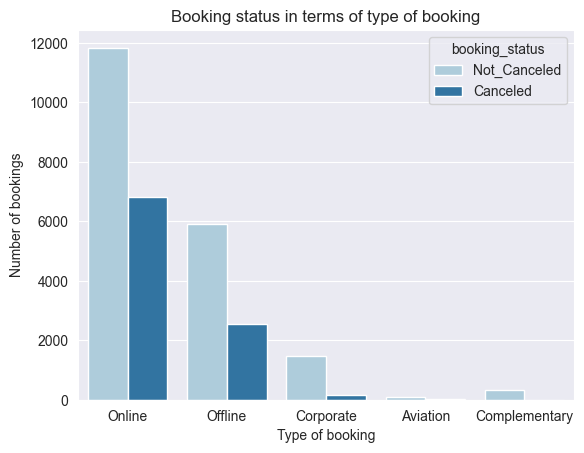

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set_palette("Paired")
sns.countplot(data=hotels,
             x="market_segment_type",
             hue="booking_status")
plt.title("Booking status in terms of type of booking")
plt.xlabel("Type of booking")
plt.ylabel("Number of bookings")
plt.show()

In [106]:
pct_by_market_segment = round(hotels.groupby(["booking_status"])['market_segment_type'].value_counts(normalize=True), 4) * 100
print(pct_by_market_segment)

booking_status  market_segment_type
Canceled        Online                 71.36
                Offline                26.49
                Corporate               1.82
                Aviation                0.33
Not_Canceled    Online                 60.37
                Offline                30.20
                Corporate               7.42
                Complementary           1.63
                Aviation                0.38
Name: market_segment_type, dtype: float64


From histogram and calculations above we can conlclude that online and offline bookings are most common for clients.

71% of canceled bookings are canceled online, and 26% offline.

Let's have a look on correlation between numeric columns.

<AxesSubplot: >

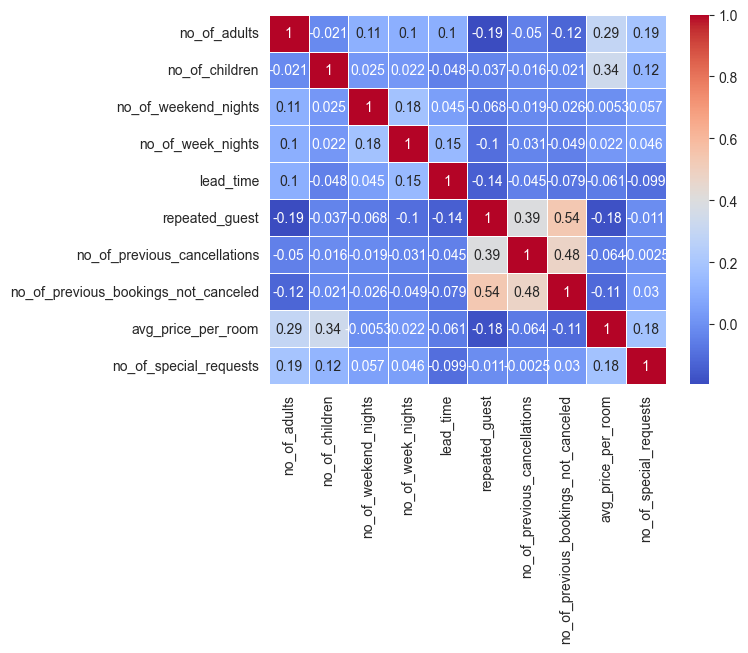

In [107]:
sns.heatmap(hotels.corr(), annot=True, linewidth=.5, cmap="coolwarm")


There is no strong correlation between numeric values. 

Data summary

In [108]:
hotels.groupby('booking_status').mean()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
booking_status,,,,,,,,,,
Canceled,1.912020,0.125222,0.893190,2.389057,139.316037,0.001046,0.006068,0.001046,110.703972,0.333089
Not_Canceled,1.813421,0.094845,0.774718,2.112233,58.944980,0.038397,0.032788,0.243792,99.929636,0.761919


Further we will look closer at 'lead_time' and 'no_of_special_requests'.

<AxesSubplot: xlabel='booking_status', ylabel='lead_time'>

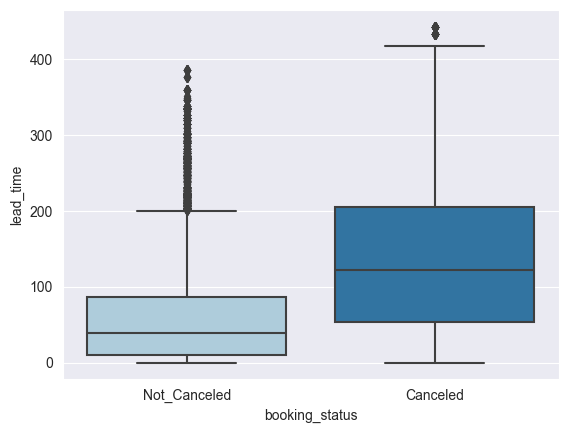

In [109]:
sns.boxplot(data=hotels,
           x="booking_status",
           y="lead_time")

In [110]:
hotels.groupby("booking_status")["lead_time"].median()

booking_status
Canceled        122.0
Not_Canceled     39.0
Name: lead_time, dtype: float64

Canceled bookings has median lead time of 122 days. The larger lead time, the larger possibility of booking cancellation. The median lead time for 'Not_Canceled' bookings is 39 days. 

<AxesSubplot: xlabel='no_of_special_requests', ylabel='count'>

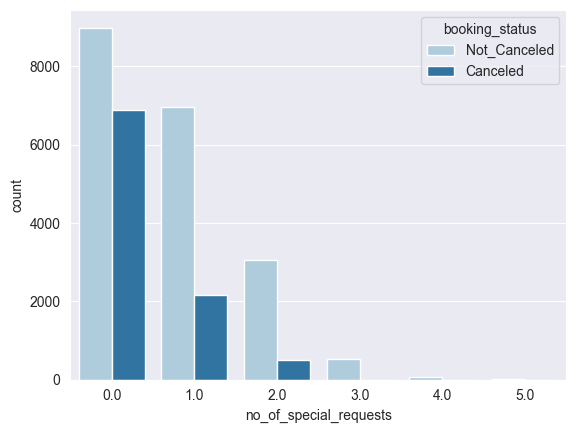

In [111]:
sns.countplot(data=hotels,
              x="no_of_special_requests",
              hue="booking_status")

Guests with more than 1 special request tend to not cancel bookings.

In [112]:
hotels.groupby(["no_of_special_requests"])["booking_status"].value_counts(normalize=True) * 100

no_of_special_requests  booking_status
0.0                     Not_Canceled       56.633713
                        Canceled           43.366287
1.0                     Not_Canceled       76.344322
                        Canceled           23.655678
2.0                     Not_Canceled       85.605848
                        Canceled           14.394152
3.0                     Not_Canceled      100.000000
4.0                     Not_Canceled      100.000000
5.0                     Not_Canceled      100.000000
Name: booking_status, dtype: float64

<AxesSubplot: xlabel='arrival_dayname', ylabel='count'>

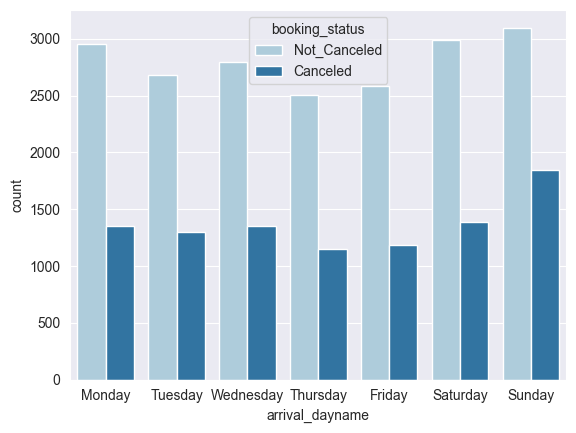

In [113]:
hotels["arrival_dayname"] = hotels["full_arrival_date"].dt.day_name()

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(data=hotels,
            x="arrival_dayname",
            hue="booking_status",
            order=day_order)

The guests cancel most frequently bookings with arrival date on Sunday among other weekdays.

In [114]:
(hotels.groupby(["booking_status"])['arrival_dayname'].value_counts(normalize=True)) * 100

booking_status  arrival_dayname
Canceled        Sunday             19.322105
                Saturday           14.478502
                Monday             14.112355
                Wednesday          14.112355
                Tuesday            13.557904
                Friday             12.354849
                Thursday           12.061931
Not_Canceled    Sunday             15.802356
                Saturday           15.226149
                Monday             15.078272
                Wednesday          14.277701
                Tuesday            13.665800
                Friday             13.186477
                Thursday           12.763245
Name: arrival_dayname, dtype: float64

## Conclusions

- guests who booked on average 122 days (about 4 months) before the arrival date cancel bookings;
- the most of guests who have 1 or 2 special requests doesn't cancel booking, and all guests with 3 or more special requests don't cancel bookings;
- bookings with arrival date on Sunday are canceled more often than other weekdays.